In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as layers

In [2]:
# Import MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Input data: <class 'numpy.ndarray'> (60000, 28, 28)


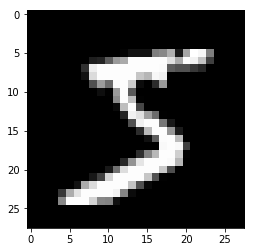

5


In [3]:
# Inspect data
print('Input data:', type(x_train), x_train.shape)

plt.imshow(x_train[0]*255, cmap='gray', vmin=0, vmax=255) # Unormalize
plt.show()

print(y_train[0])

In [5]:
# Define Network

model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(256, input_shape=(28*28,), activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(10)
])

## Note putting softmax in the last layer create instability in training.

In [9]:
# Test that forward is succesful
test_output = model(x_train[:1]).numpy()
test_output, tf.nn.softmax(test_output).numpy()

(array([[ 0.5233363 ,  0.22027704,  0.09561323,  0.71867764, -0.41901892,
          0.21541703,  0.8749125 , -0.3013891 , -0.6096111 , -0.13969927]],
       dtype=float32),
 array([[0.13462602, 0.09942876, 0.08777508, 0.16366832, 0.05246495,
         0.0989467 , 0.19134477, 0.05901403, 0.04336069, 0.06937074]],
       dtype=float32))

In [11]:
# Define loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Should be random, around -log(1/10) = 2.3
loss(y_train[:1], test_output)

<tf.Tensor: shape=(), dtype=float32, numpy=2.3131738>

In [12]:
# Compile ?
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])


In [13]:
# Train
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2821 - accuracy: 0.9170
Epoch 2/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1189 - accuracy: 0.9654
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0884 - accuracy: 0.9737
Epoch 4/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0674 - accuracy: 0.9795s - loss: 0.0674 - 
Epoch 5/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0567 - accuracy: 0.9820


In [14]:
# Evaluate
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.0747 - accuracy: 0.9792


[0.07472935552357594, 0.9792]